In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [19]:
from sklearn.datasets import make_regression

In [20]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [21]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [22]:
x = data.data
y= data.target

**TRAIN TEST SPLIT**

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### **USING LINEAR REGRESSION**

In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [33]:
reg.intercept_

151.88331005254167

In [34]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968

In [35]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

55.627840795469155


In [36]:
np.mean(cross_val_score(reg,X_train,y_train,scoring='r2',cv=10))

0.484764012049682

### **USING RIDGE REGULARIZATION**

In [37]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [38]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [39]:
y_pred1 = R.predict(X_test)

In [40]:
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.4400429511552675
55.62242316881659


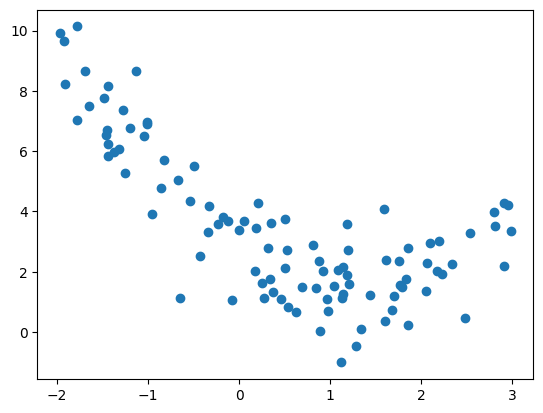

In [41]:
m=100
x1 = 5* np.random.rand(m,1) - 2
x2 = 0.7 * x1 ** 2 - 2 *x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

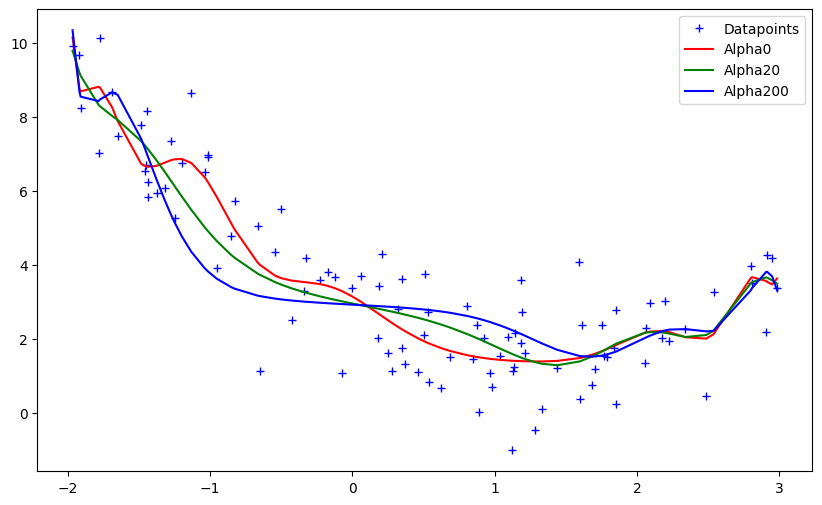

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
     model = Pipeline([
         ('poly_feats',PolynomialFeatures(degree=16)),
         ('ridge',Ridge(alpha=alpha))
     ])
     model.fit(x1,x2)
     return model.predict (x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label="Alpha{}".format(alpha))

plt.legend()
plt.show()

green line is the optimum line



red= underfitting



blue = overfitting

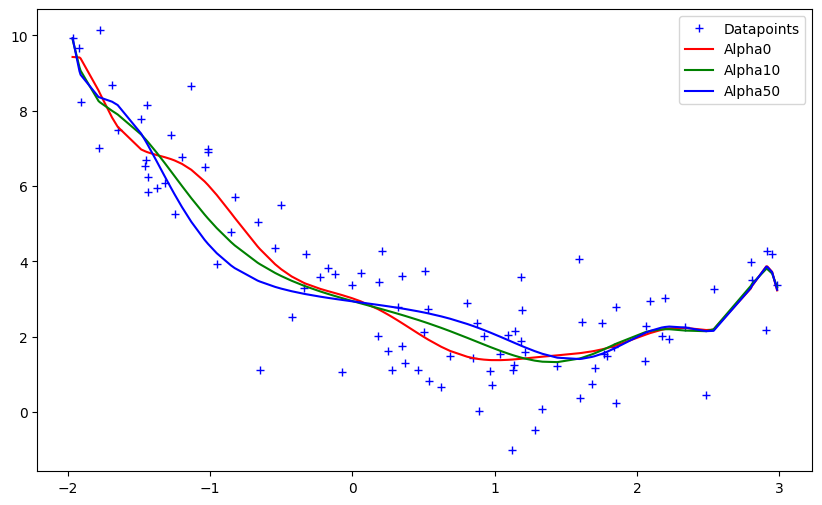

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
     model = Pipeline([
         ('poly_feats',PolynomialFeatures(degree=13)),
         ('ridge',Ridge(alpha=alpha))
     ])
     model.fit(x1,x2)
     return model.predict (x1)

alphas = [0,10,50]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label="Alpha{}".format(alpha))

plt.legend()
plt.show()